## 4.10 Customer Profiles and Charts

### Contents

01 Import Libraries and Data

02 Goods Purchased

03 Babies

04 Pets

05 Age Groups

06 Household Groups

07 Income Groups

08 Customer Profile Groups

09 Customer Profile Bar Chart

10 Orders by Customer Profile Bar Chart

11 Profile Comparison of Money Spent to Number of Orders Scatterplot

12 Baby and Pet Statistics

13 Export Data

### 01 Import Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set the max columns option to None
pd.set_option('display.max_columns', None)

In [3]:
# Create path variable for main project folder
path = r'D:\JupyterProjects\06-2022 Instacart Basket Analysis'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_exclude.pkl'))

In [5]:
df.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_prior,frequency_flag,gender,state,age,date_joined,no_of_dependents,fam_status,income,region,exclude
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,0
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,0
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,0
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,0
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,0
5,3367565,1,6,2,7,19.0,False,196,1,1,Soda,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,0
6,550135,1,7,1,9,20.0,False,196,1,1,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,0
7,3108588,1,8,1,14,14.0,False,196,2,1,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,0
8,2295261,1,9,1,16,0.0,False,196,4,1,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,0
9,2550362,1,10,4,8,30.0,False,196,1,1,Soda,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,0


In [6]:
# Check dimensions
df.shape

(30964564, 32)

In [7]:
# Set floating rounding to two decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

### 02 Goods Purchased

In [8]:
# Assign names of departments based on department_id for goods purchased

goods = []

for value in df['department_id']:
    if value == 1:
        goods.append('Frozen')
    elif value == 2:
        goods.append('Other')
    elif value == 3:
        goods.append('Bakery')
    elif value == 4:
        goods.append('Produce')
    elif value == 5:
        goods.append('Alcohol')
    elif value == 6:
        goods.append('International')
    elif value == 7:
        goods.append('Beverages')
    elif value == 8:
        goods.append('Pets')
    elif value == 9:
        goods.append('Dry goods pasta')
    elif value == 10:
        goods.append('Bulk')
    elif value == 11:
        goods.append('Personal care')
    elif value == 12:
        goods.append('Meat seafood')
    elif value == 13:
        goods.append('Pantry')
    elif value == 14:
        goods.append('Breakfast')
    elif value == 15:
        goods.append('Canned goods')
    elif value == 16:
        goods.append('Dairy eggs')
    elif value == 17:
        goods.append('Household')
    elif value == 18:
        goods.append('Babies')
    elif value == 19:
        goods.append('Snacks')
    elif value == 20:
        goods.append('Deli')
    elif value == 21:
        goods.append('Missing')

In [9]:
# Assign goods profile to column
df['goods'] = goods

In [10]:
# View goods distribution
df['goods'].value_counts()

Produce            9079273
Dairy eggs         5177182
Snacks             2766406
Beverages          2571901
Frozen             2121731
Pantry             1782705
Bakery             1120828
Canned goods       1012074
Deli               1003834
Dry goods pasta     822136
Household           699857
Meat seafood        674781
Breakfast           670850
Personal care       424306
Babies              410392
International       255991
Alcohol             144627
Pets                 93060
Missing              64768
Other                34411
Bulk                 33451
Name: goods, dtype: int64

### 03 Babies

In [11]:
# Assign value of 1 (True) to pets column if product purchased from the Babies department.  If not, assign 0 (False).
df['baby'] = [1 if x == 'Babies' else 0 for x in df['goods']]

In [12]:
# Group by user_id and assign value of 1 to all records for customer if any baby products were purchased
df['baby'] = df.groupby(['user_id'])['baby'].transform('max')

In [13]:
# View baby distribution
df['baby'].value_counts()

0    21154311
1     9810253
Name: baby, dtype: int64

In [14]:
# Reduce data type size of baby column from int64 to int8 column for memory savings
df['baby'] = df['baby'].astype('int8')

### 04 Pets

In [15]:
# Assign value of 1 (True) to pets column if product purchased from the Pets department.  If not, assign 0 (False).
df['pets'] = [1 if x == 'Pets' else 0 for x in df['goods']]

In [16]:
# Group by user_id and assign value of 1 to all records for customer if any pet products were purchased
df['pets'] = df.groupby(['user_id'])['pets'].transform('max')

In [17]:
# View pets distribution
df['pets'].value_counts()

0    27513213
1     3451351
Name: pets, dtype: int64

In [18]:
# Reduce data type size of pets column from int64 to int8 column for memory savings
df['pets'] = df['pets'].astype('int8')

### 05 Age Groups

In [19]:
# Create age group flag
df.loc[df['age'] <= 24, 'age_group'] = 'Young Adult'
df.loc[(df['age'] > 24) & (df['age'] <=64), 'age_group'] = 'Adult' 
df.loc[df['age'] >=65, 'age_group'] = 'Senior'

In [20]:
# View age group distribution
df['age_group'].value_counts()

Adult          19353826
Senior          8195544
Young Adult     3415194
Name: age_group, dtype: int64

### 06 Household Groups

In [21]:
# View family status distribution
df['fam_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

In [22]:
# View dependents distribution
df['no_of_dependents'].value_counts()

3    7772516
0    7739681
2    7733261
1    7719106
Name: no_of_dependents, dtype: int64

In [23]:
# Create household group combining family status and dependents
df.loc[(df['fam_status'] == 'married') & (df['no_of_dependents'] == 0), 'household'] = 'Married' 
df.loc[(df['fam_status'] == 'married') & (df['no_of_dependents'] >= 1), 'household'] = 'Married/Dep' 
df.loc[(df['fam_status'] == 'single') & (df['no_of_dependents'] == 0), 'household'] = 'Single' 
df.loc[(df['fam_status'] == 'single') & (df['no_of_dependents'] >= 1), 'household'] = 'Single/Dep' 
df.loc[(df['fam_status'] == 'divorced/widowed') & (df['no_of_dependents'] == 0), 'household'] = 'Div/Wid' 
df.loc[(df['fam_status'] == 'divorced/widowed') & (df['no_of_dependents'] >= 1), 'household'] = 'Div/Wid/Dep' 
df.loc[(df['fam_status'] == 'living with parents and siblings') & (df['no_of_dependents'] == 0), 'household'] = 'WithParents' 
df.loc[(df['fam_status'] == 'living with parents and siblings') & (df['no_of_dependents'] >= 1), 'household'] = 'WithParents/Dep'

In [24]:
# View household distribution
df['household'].value_counts()

Married/Dep        21743711
Single              5094410
Div/Wid             2645271
WithParents/Dep     1481172
Name: household, dtype: int64

In [25]:
df['household'].value_counts().sum()

30964564

### 07 Income Groups

In [26]:
# Create Income Flag
# Source for income classifications:  https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-systemdf.loc[df['income'] <= 52000, 'income_flag'] = 'Low income'
df.loc[df['income'] <= 52200, 'income_group'] = 'Low Income'
df.loc[(df['income'] > 52200) & (df['income'] <=156600), 'income_group'] = 'Middle Income' 
df.loc[df['income'] > 156600, 'income_group'] = 'Upper Income'

In [27]:
# View income distribution
df['income_group'].value_counts().sum()

30964564

### 08 Customer Profile Groups

In [28]:
# Add age test to household groups identified above
df.loc[(df['household'] == 'Married/Dep') & (df['age_group'] == 'Young Adult'), 'profile'] = 'YA/Married/Dep'
df.loc[(df['household'] == 'Married/Dep') & (df['age_group'] == 'Adult'), 'profile'] = 'Adult/Married/Dep'
df.loc[(df['household'] == 'Married/Dep') & (df['age_group'] == 'Senior'), 'profile'] = 'Senior/Married/Dep'

df.loc[(df['household'] == 'Single') & (df['age_group'] == 'Young Adult'), 'profile'] = 'YA/Single'
df.loc[(df['household'] == 'Single') & (df['age_group'] == 'Adult'), 'profile'] = 'Adult/Single'
df.loc[(df['household'] == 'Single') & (df['age_group'] == 'Senior'), 'profile'] = 'Senior/Single'

df.loc[(df['household'] == 'Div/Wid') & (df['age_group'] == 'Young Adult'), 'profile'] = 'YA/Div/Wid'
df.loc[(df['household'] == 'Div/Wid') & (df['age_group'] == 'Adult'), 'profile'] = 'Adult/Div/Wid'
df.loc[(df['household'] == 'Div/Wid') & (df['age_group'] == 'Senior'), 'profile'] = 'Senior/Div/Wid'

df.loc[(df['household'] == 'WithParents/Dep') & (df['age_group'] == 'Young Adult'), 'profile'] = 'YA/WithParents/Dep'
df.loc[(df['household'] == 'WithParents/Dep') & (df['age_group'] == 'Adult'), 'profile'] = 'Adult/WithPar/Dep'
df.loc[(df['household'] == 'WithParents/Dep') & (df['age_group'] == 'Senior'), 'profile'] = 'Senior/WithPar/Dep'


In [29]:
# View profile distibution
df['profile'].value_counts()

Adult/Married/Dep     14461613
Senior/Married/Dep     6173586
Adult/Single           4268900
Senior/Div/Wid         2021958
YA/WithParents/Dep     1481172
YA/Married/Dep         1108512
YA/Single               825510
Adult/Div/Wid           623313
Name: profile, dtype: int64

In [30]:
# Check sum of profile entries
df['profile'].value_counts().sum()

30964564

In [31]:
# Add income test to profile

In [32]:
df.loc[(df['household'] == 'Married/Dep') & (df['age_group'] == 'Adult') & (df['income_group'] == 'Low Income'), 'profile'] = 'Adult/Married/Dep/Low'
df.loc[(df['household'] == 'Married/Dep') & (df['age_group'] == 'Adult') & (df['income_group'] == 'Middle Income'), 'profile'] = 'Adult/Married/Dep/Mid'
df.loc[(df['household'] == 'Married/Dep') & (df['age_group'] == 'Adult') & (df['income_group'] == 'Upper Income'), 'profile'] = 'Adult/Married/Dep/Up'
df.loc[(df['household'] == 'Married/Dep') & (df['age_group'] == 'Senior') & (df['income_group'] == 'Low Income'), 'profile'] = 'Senior/Married/Dep/Low'
df.loc[(df['household'] == 'Married/Dep') & (df['age_group'] == 'Senior') & (df['income_group'] == 'Middle Income'), 'profile'] = 'Senior/Married/Dep/Mid'
df.loc[(df['household'] == 'Married/Dep') & (df['age_group'] == 'Senior') & (df['income_group'] == 'Upper Income'), 'profile'] = 'Senior/Married/Dep/Up'
df.loc[(df['household'] == 'Single') & (df['age_group'] == 'Adult') & (df['income_group'] == 'Low Income'), 'profile'] = 'Adult/Single/Low'
df.loc[(df['household'] == 'Single') & (df['age_group'] == 'Adult') & (df['income_group'] == 'Middle Income'), 'profile'] = 'Adult/Single/Mid'
df.loc[(df['household'] == 'Single') & (df['age_group'] == 'Adult') & (df['income_group'] == 'Upper Income'), 'profile'] = 'Adult/Single/Up'
df.loc[(df['household'] == 'Div/Wid') & (df['age_group'] == 'Senior') & (df['income_group'] == 'Low Income'), 'profile'] = 'Senior/Div/Wid/Low'
df.loc[(df['household'] == 'Div/Wid') & (df['age_group'] == 'Senior') & (df['income_group'] == 'Middle Income'), 'profile'] = 'Senior/Div/Wid/Mid'
df.loc[(df['household'] == 'Div/Wid') & (df['age_group'] == 'Senior') & (df['income_group'] == 'Upper Income'), 'profile'] = 'Senior/Div/Wid/Up'
df.loc[(df['household'] == 'WithParents/Dep') & (df['age_group'] == 'Young Adult') & (df['income_group'] == 'Low Income'), 'profile'] = 'YA/WithParents/Dep/Low'
df.loc[(df['household'] == 'WithParents/Dep') & (df['age_group'] == 'Young Adult') & (df['income_group'] == 'Middle Income'), 'profile'] = 'YA/WithParents/Dep/Mid'
df.loc[(df['household'] == 'WithParents/Dep') & (df['age_group'] == 'Young Adult') & (df['income_group'] == 'Upper Income'), 'profile'] = 'YA/WithParents/Dep/Up'
df.loc[(df['household'] == 'Married/Dep') & (df['age_group'] == 'Young Adult') & (df['income_group'] == 'Low Income'), 'profile'] = 'YA/Married/Dep/Low'
df.loc[(df['household'] == 'Married/Dep') & (df['age_group'] == 'Young Adult') & (df['income_group'] == 'Middle Income'), 'profile'] = 'YA/Married/Dep/Mid'
df.loc[(df['household'] == 'Married/Dep') & (df['age_group'] == 'Young Adult') & (df['income_group'] == 'Upper Income'), 'profile'] = 'YA/Married/Dep/Up'
df.loc[(df['household'] == 'Single') & (df['age_group'] == 'Young Adult') & (df['income_group'] == 'Low Income'), 'profile'] = 'YA/Single/Low'
df.loc[(df['household'] == 'Single') & (df['age_group'] == 'Young Adult') & (df['income_group'] == 'Middle Income'), 'profile'] = 'YA/Single/Mid'
df.loc[(df['household'] == 'Single') & (df['age_group'] == 'Young Adult') & (df['income_group'] == 'Upper Income'), 'profile'] = 'YA/Single/Up'
df.loc[(df['household'] == 'Div/Wid') & (df['age_group'] == 'Adult') & (df['income_group'] == 'Low Income'), 'profile'] = 'Adult/Div/Wid/Low'
df.loc[(df['household'] == 'Div/Wid') & (df['age_group'] == 'Adult') & (df['income_group'] == 'Middle Income'), 'profile'] = 'Adult/Div/Wid/Mid'
df.loc[(df['household'] == 'Div/Wid') & (df['age_group'] == 'Adult') & (df['income_group'] == 'Upper Income'), 'profile'] = 'Adult/Div/Wid/Up'


In [33]:
# View profile distibution
df['profile'].value_counts()

Adult/Married/Dep/Mid     11494694
Senior/Married/Dep/Mid     4808014
Adult/Single/Mid           3378208
Adult/Married/Dep/Low      1761597
Senior/Div/Wid/Mid         1581046
YA/WithParents/Dep/Mid     1217642
Adult/Married/Dep/Up       1205322
YA/Married/Dep/Mid          910669
Senior/Married/Dep/Up       803591
YA/Single/Mid               668546
Senior/Married/Dep/Low      561981
Adult/Single/Low            551960
Adult/Div/Wid/Mid           481829
Adult/Single/Up             338732
Senior/Div/Wid/Up           271939
YA/WithParents/Dep/Low      250513
YA/Married/Dep/Low          190597
Senior/Div/Wid/Low          168973
YA/Single/Low               149405
Adult/Div/Wid/Up             84057
Adult/Div/Wid/Low            57427
YA/WithParents/Dep/Up        13017
YA/Single/Up                  7559
YA/Married/Dep/Up             7246
Name: profile, dtype: int64

In [34]:
# Check sum of profile entries
df['profile'].value_counts().sum()

30964564

In [35]:
# Create customers dataframe
customers = df.drop_duplicates(subset=['user_id'])
customers.shape

(162631, 39)

In [36]:
# View profile distibution in customers dataframe
customers['profile'].value_counts(dropna = False)

Adult/Married/Dep/Mid     57291
Senior/Married/Dep/Mid    24337
Adult/Single/Mid          16881
Adult/Married/Dep/Low     13000
Senior/Div/Wid/Mid         7984
YA/WithParents/Dep/Mid     5871
Adult/Married/Dep/Up       5747
YA/Married/Dep/Mid         4373
Senior/Married/Dep/Low     4302
Adult/Single/Low           4011
Senior/Married/Dep/Up      3908
YA/Single/Mid              3423
Adult/Div/Wid/Mid          2329
YA/WithParents/Dep/Low     1694
Adult/Single/Up            1557
Senior/Div/Wid/Low         1396
Senior/Div/Wid/Up          1323
YA/Married/Dep/Low         1303
YA/Single/Low              1002
Adult/Div/Wid/Low           425
Adult/Div/Wid/Up            374
YA/WithParents/Dep/Up        43
YA/Married/Dep/Up            35
YA/Single/Up                 22
Name: profile, dtype: int64

In [37]:
# Check sum of profile entries for customers dataframe
customers['profile'].value_counts().sum()

162631

### 09 Customer Profiles Bar Chart

Text(0, 0.5, '')

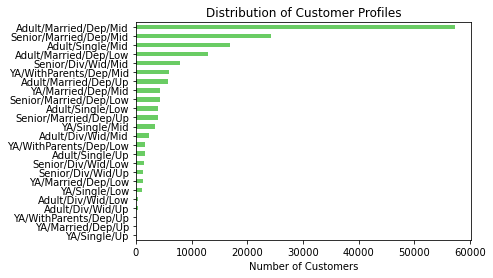

In [38]:
# Create bar chart for distribution of customer profiles
bar = customers['profile'].value_counts().sort_values().plot.barh(title = 'Distribution of Customer Profiles', 
                                            ylabel = 'Number of Customers', color = sns.color_palette("muted")[2])

plt.xlabel('Number of Customers')
plt.ylabel('')

In [39]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_agefam_in_ex.png'))

### 10 Orders by Customer Profile Bar Chart

In [40]:
# Create orders dataframe
orders = df.drop_duplicates(subset=['order_id'])
orders.shape

(3064375, 39)

Text(0, 0.5, '')

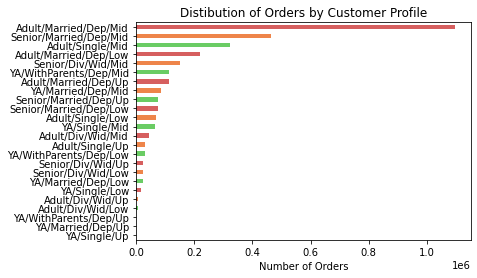

In [41]:
# Distribution of orders by customer profile
data = orders['profile'].value_counts().sort_values()
bar_profile_orders = data.plot.barh(color = ['#6acc64', '#ee854a', '#d65f5f'],
                                      legend=None, ylabel='Order Count', title='Distibution of Orders by Customer Profile')

plt.xlabel('Number of Orders')
plt.ylabel('')

In [42]:
# Export bar chart
bar_profile_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_pro__ord_ex.png'))

### 11 Profile Comparison of Money Spent to Number of Orders Scatterplot

In [43]:
df['prices'] = df['prices'].astype('float32')

In [44]:
# Sum prices for total money spent by each profile group
profile_prices = df.groupby('profile')['prices'].sum().sort_values(ascending=False)

In [45]:
# View money spent by profile
profile_prices

profile
Adult/Married/Dep/Mid    91115872.00
Senior/Married/Dep/Mid   38071732.00
Adult/Single/Mid         26788642.00
Senior/Div/Wid/Mid       12516586.00
Adult/Married/Dep/Low    11945662.00
YA/WithParents/Dep/Mid    9691426.00
Adult/Married/Dep/Up      9550254.00
YA/Married/Dep/Mid        7234317.00
Senior/Married/Dep/Up     6386476.50
YA/Single/Mid             5317418.50
Adult/Div/Wid/Mid         3818288.50
Adult/Single/Low          3763681.75
Senior/Married/Dep/Low    3656841.50
Adult/Single/Up           2677416.00
Senior/Div/Wid/Up         2155833.00
YA/WithParents/Dep/Low    1758342.62
YA/Married/Dep/Low        1342108.00
Senior/Div/Wid/Low        1099833.62
YA/Single/Low             1041131.25
Adult/Div/Wid/Up           664879.25
Adult/Div/Wid/Low          376597.00
YA/WithParents/Dep/Up      102570.91
YA/Single/Up                58188.20
YA/Married/Dep/Up           56120.72
Name: prices, dtype: float32

In [46]:
# Sum the maximum order number for each customer by profile group
profile_max=customers.groupby('profile')['max_order'].sum().sort_values(ascending=False)

In [47]:
profile_max

profile
Adult/Married/Dep/Mid    1095263.00
Senior/Married/Dep/Mid    462959.00
Adult/Single/Mid          324675.00
Adult/Married/Dep/Low     220718.00
Senior/Div/Wid/Mid        151502.00
YA/WithParents/Dep/Mid    114776.00
Adult/Married/Dep/Up      113431.00
YA/Married/Dep/Mid         84886.00
Senior/Married/Dep/Up      75525.00
Senior/Married/Dep/Low     75248.00
Adult/Single/Low           67941.00
YA/Single/Mid              64533.00
Adult/Div/Wid/Mid          45148.00
Adult/Single/Up            31164.00
YA/WithParents/Dep/Low     29406.00
Senior/Div/Wid/Up          25916.00
Senior/Div/Wid/Low         23591.00
YA/Married/Dep/Low         22620.00
YA/Single/Low              17561.00
Adult/Div/Wid/Up            7865.00
Adult/Div/Wid/Low           7313.00
YA/WithParents/Dep/Up       1207.00
YA/Married/Dep/Up            706.00
YA/Single/Up                 580.00
Name: max_order, dtype: float64

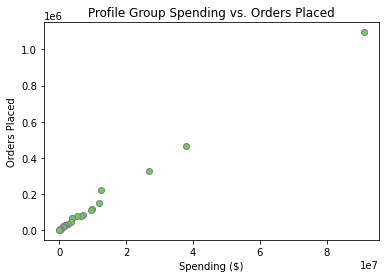

In [48]:
# Create scatterplot
scatter_profile = plt.scatter(profile_prices, profile_max, color = '#6acc64', edgecolors='gray')

plt.title('Profile Group Spending vs. Orders Placed')
plt.xlabel('Spending ($)')
plt.ylabel('Orders Placed')
plt.show()

In [49]:
# Export scatterplot
scatter_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_profile_ex.png'))

### 12 Baby and Pet Statistics

In [50]:
# View sum spent by department
df.groupby('goods')['prices'].sum().sort_values(ascending = False)

goods
Produce           72453328.00
Dairy eggs        43117576.00
Beverages         19758370.00
Frozen            16408887.00
Pantry            14287506.00
Snacks            11828022.00
Meat seafood      10998508.00
Bakery             8806762.00
Deli               7812815.50
Canned goods       7637854.50
Dry goods pasta    6042226.50
Breakfast          5388185.00
Household          5164900.50
Personal care      3393936.00
Babies             3133079.25
International      1965754.62
Alcohol            1178806.75
Pets                734015.69
Missing             560901.75
Bulk                279209.41
Other               239570.80
Name: prices, dtype: float32

In [51]:
# Sum of all sales
df['prices'].sum()

241189810.0

In [52]:
# Babies department % of sales
3133079.25/241189810.0*100

1.2990097923291204

In [53]:
# Pets department % of sales
734015.69/241189810.0*100

0.3043311365434551

In [54]:
# Crosstab of baby and pet flags
pd.crosstab(customers['baby'], customers['pets'], normalize=True)*100

pets,0,1
baby,,
0,75.13,6.28
1,16.76,1.82


In [55]:
pd.crosstab(customers['profile'], customers['pets'])

pets,0,1
profile,,
Adult/Div/Wid/Low,407,18
Adult/Div/Wid/Mid,2136,193
Adult/Div/Wid/Up,339,35
Adult/Married/Dep/Low,12300,700
Adult/Married/Dep/Mid,52447,4844
Adult/Married/Dep/Up,5165,582
Adult/Single/Low,3771,240
Adult/Single/Mid,15467,1414
Adult/Single/Up,1376,181


In [56]:
pd.crosstab(customers['profile'], customers['baby'])

baby,0,1
profile,,
Adult/Div/Wid/Low,387,38
Adult/Div/Wid/Mid,1825,504
Adult/Div/Wid/Up,287,87
Adult/Married/Dep/Low,11573,1427
Adult/Married/Dep/Mid,45728,11563
Adult/Married/Dep/Up,4567,1180
Adult/Single/Low,3552,459
Adult/Single/Mid,13560,3321
Adult/Single/Up,1218,339


In [57]:
# View min, mean, and max of order frequency by profile
customers.groupby('profile').agg({'median_days_prior':['min', 'mean', 'max']})

median_days_prior            
                                     min  mean   max
profile                                             
Adult/Div/Wid/Low                   1.00 14.73 30.00
Adult/Div/Wid/Mid                   0.00 13.70 30.00
Adult/Div/Wid/Up                    0.00 13.08 30.00
Adult/Married/Dep/Low               0.00 14.70 30.00
Adult/Married/Dep/Mid               0.00 13.61 30.00
Adult/Married/Dep/Up                0.00 13.38 30.00
Adult/Single/Low                    0.00 14.75 30.00
Adult/Single/Mid                    0.00 13.63 30.00
Adult/Single/Up                     0.00 13.25 30.00
Senior/Div/Wid/Low                  0.00 14.59 30.00
Senior/Div/Wid/Mid                  0.50 13.45 30.00
Senior/Div/Wid/Up                   1.00 13.56 30.00
Senior/Married/Dep/Low              0.00 14.55 30.00
Senior/Married/Dep/Mid              0.00 13.68 30.00
Senior/Married/Dep/Up               0.00 13.31 30.00
YA/Married/Dep/Low                  0.00 14.20 30.00
YA/Married/Dep/Mid                  0.00 13.52 30.00
YA/Married/Dep/Up                   2.00 13.23 30.00
YA/Single/Low                       0.00 14.82 30.00
YA/Single/Mid                       0.00 13.72 30.00
YA/Single/Up                        3.00 12.77 30.00
YA/WithParents/Dep/Low              0.00 14.50 30.00
YA/WithParents/Dep/Mid              0.00 13.48 30.00
YA/WithParents/Dep/Up               2.00 10.67 30.00

### 13 Export Data

In [58]:
# Export dataframe
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_profile.pkl'))
